Connected to cmri (Python 3.9.0)

In [29]:
# This import is necessary to run the code cell-by-cell
try:
    from lab08_solution import *

    print("lab08_solution is being used")

except ImportError:
    from lab08 import *

    print("lab08 is being used")

In [30]:
op = Lab08_op()
kdata_fs, kdata_us = op.load_data()

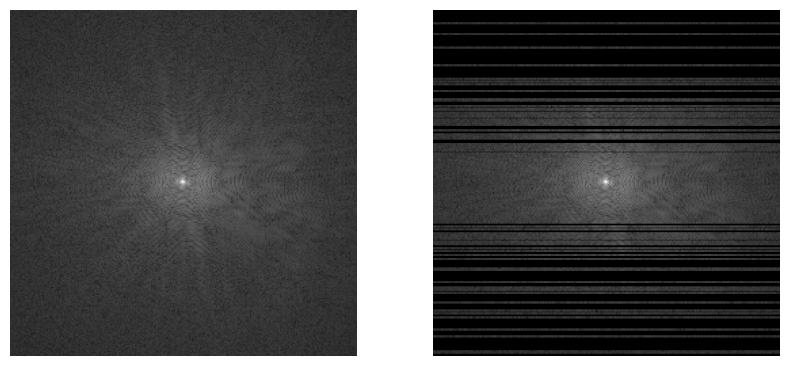

In [31]:
utils.imshow([kdata_fs, kdata_us], norm=0.2)

In [32]:
gt = utils.ifft2c(kdata_fs)
c_real = pywt.wavedec2(np.real(gt), wavelet="db4")
c_real_array, coeff_slice = pywt.coeffs_to_array(c_real)

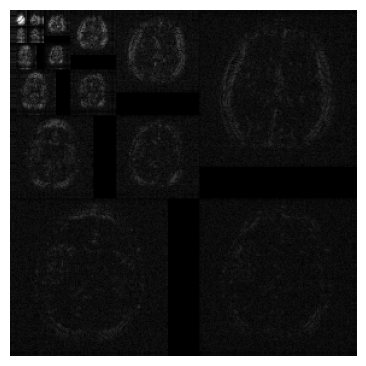

In [33]:
utils.imshow([c_real_array], norm=0.4)

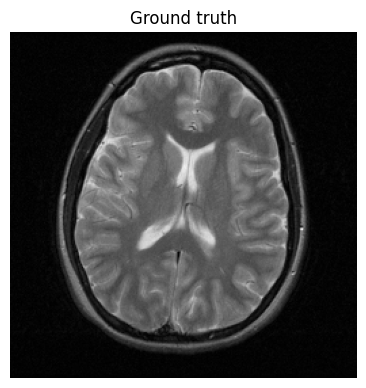

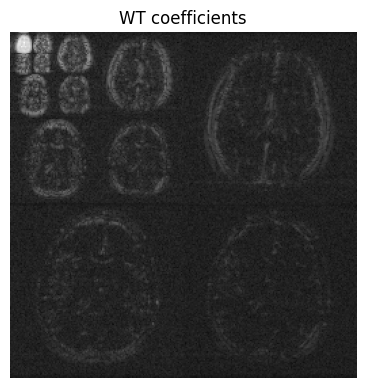

In [34]:
gt = utils.ifft2c(kdata_fs)
coeff_arr_cmplx, coeff_slice = op.dwt2(gt)

utils.imshow([gt], titles=["Ground truth"])
utils.imshow([coeff_arr_cmplx], titles=["WT coefficients"], norm=0.3)

In [35]:
# Is the wavelet transform sparser than the ground truth?
print("Is the wavelet transform sparser than the ground truth?")
print(op.is_wt_sparser(gt, coeff_arr_cmplx))

Is the wavelet transform sparser than the ground truth?
True


In [36]:
C = [5, 10, 20]
recons = []
for factor in C:
    compressed = op.compress(coeff_arr_cmplx.copy(), factor)
    recon = op.idwt2(compressed, coeff_slice)
    recons.append(recon)

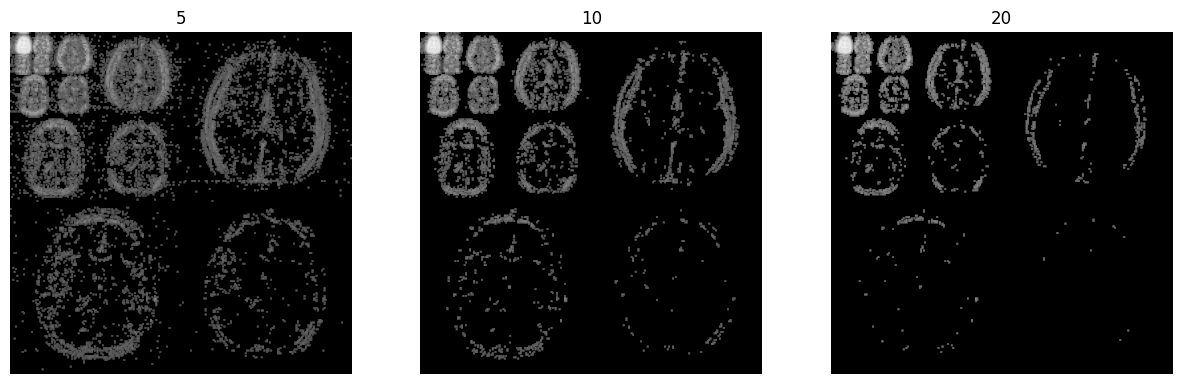

In [27]:
C = [5, 10, 20]

compressed1 = op.compress(coeff_arr_cmplx.copy(), 5)
compressed2 = op.compress(coeff_arr_cmplx.copy(), 10)
compressed3 = op.compress(coeff_arr_cmplx.copy(), 20)

utils.imshow([compressed1, compressed2, compressed3], titles=C, norm=0.2)

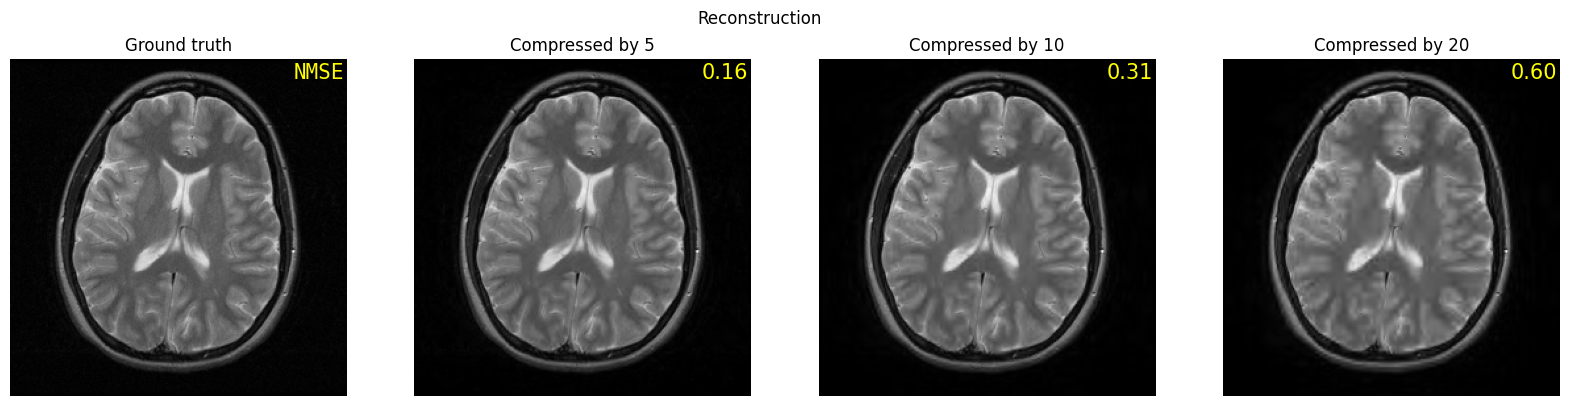

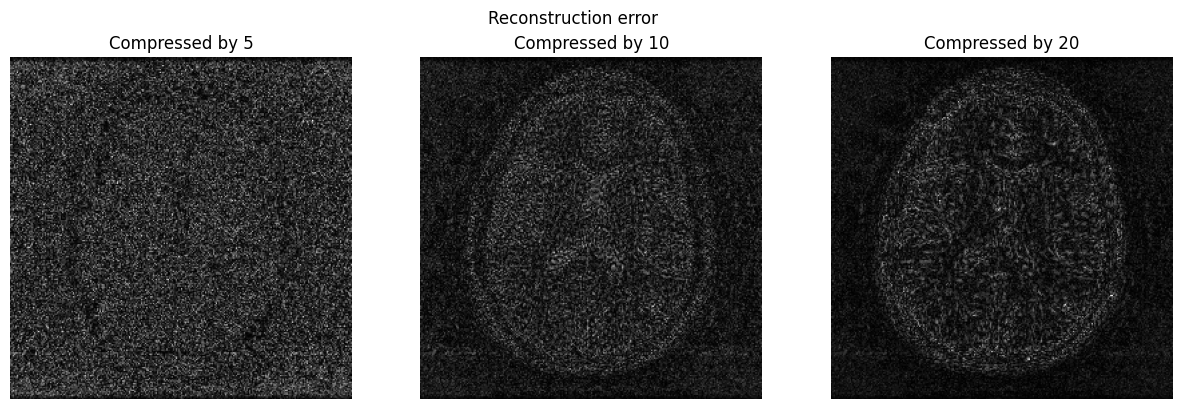

In [37]:
norm_gt = utils.normalization(np.abs(gt))
diff_imgs = [norm_gt - utils.normalization(np.abs(i)) for i in recons]

utils.imshow(recons, gt=gt, titles=[f"Compressed by {factor}" for factor in C], suptitle="Reconstruction")
utils.imshow(
    diff_imgs,
    titles=[f"Compressed by {factor}" for factor in C],
    suptitle="Reconstruction error",
)

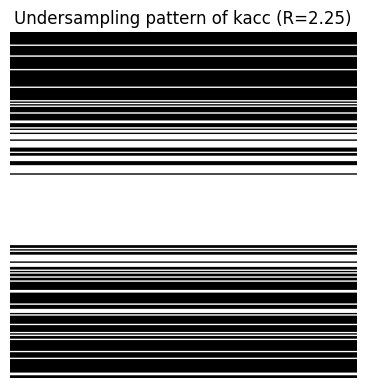

In [9]:
acc_ratio = np.count_nonzero(kdata_us) / kdata_fs.size
acc = 1 / acc_ratio
sampling_mask = op.get_sampling_mask(kdata_us)
utils.imshow([sampling_mask], titles=[f"Undersampling pattern of kacc (R={acc:.2f})"])

In [ ]:
a = np.random.rand(10, 10)
lamda_percent = 5
lamda = 5 / 100

threshold_val = lamda * np.max(np.abs(a))
print(a)
print(threshold_val)

Iteration  29: 100%|██████████| 30/30 [00:02<00:00, 11.58iter/s, Cost=382.09827]


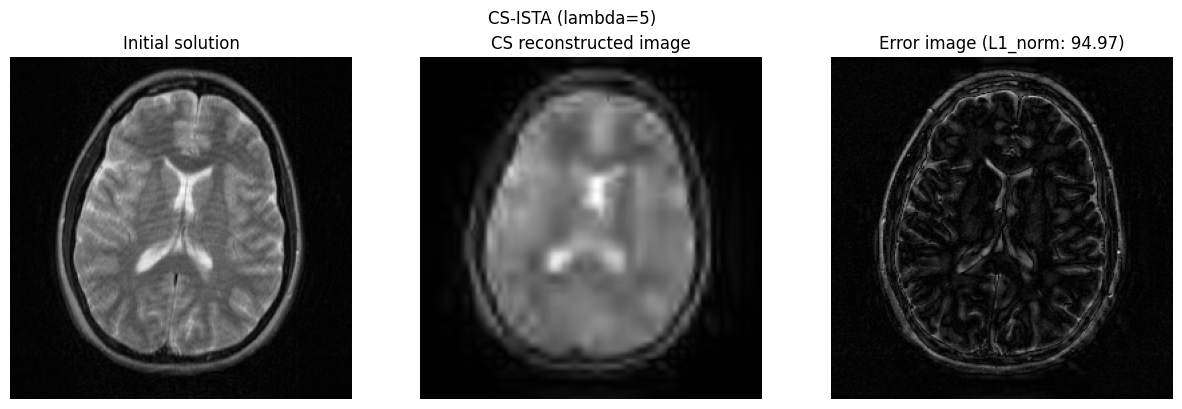

Iteration  29: 100%|██████████| 30/30 [00:02<00:00, 11.83iter/s, Cost=81.90201]


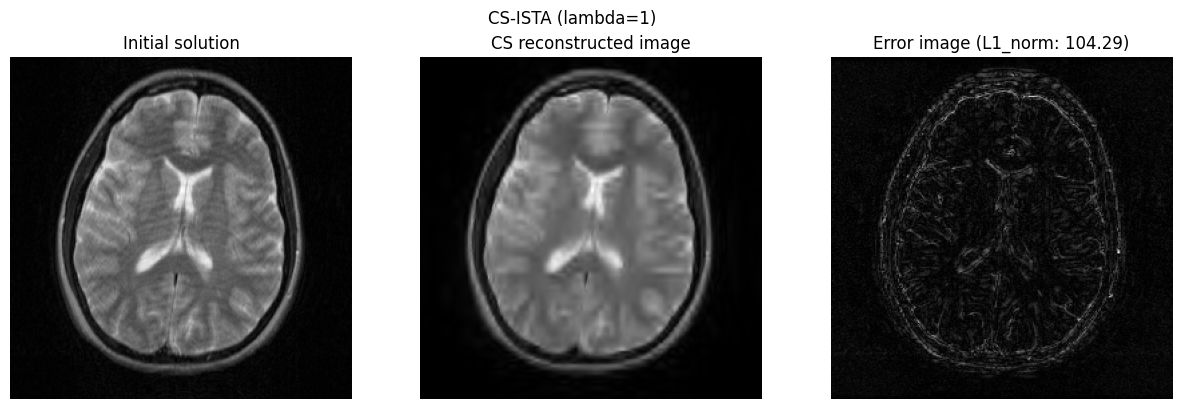

Iteration  29: 100%|██████████| 30/30 [00:03<00:00,  8.78iter/s, Cost=39.49733]


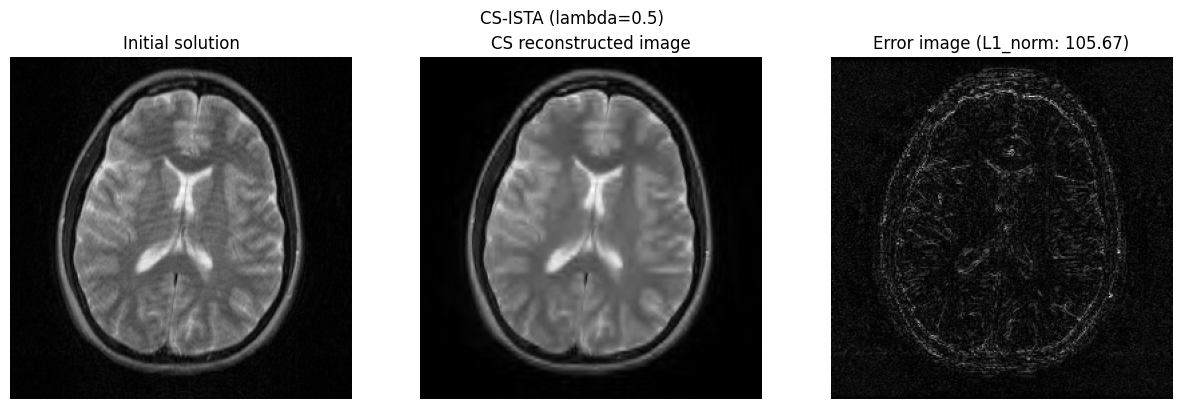

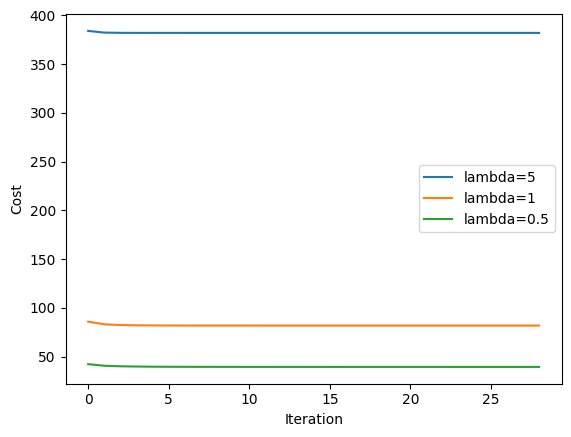

In [11]:
lamdas = [5, 1, 0.5]
cost_list = []
for i, lamda in enumerate(lamdas, start=1):
    rec, inter_m, costs = op.cs_ista(kdata_us, lamda, 30)
    utils.create_gif(inter_m, f"CS-{i}")
    utils.imshow(
        [inter_m[0], rec, np.abs(gt) - (np.abs(rec))],
        titles=[
            "Initial solution",
            "CS reconstructed image",
            f"Error image (L1_norm: {np.linalg.norm(rec,ord=1):.2f})",
        ],
        suptitle=f"CS-ISTA (lambda={lamda})",
    )
    cost_list.append(costs)

f, a = plt.subplots()
for cost, lamda in zip(cost_list, lamdas):
    a.plot(cost, label=f"lambda={lamda}")
plt.legend()
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.show()